In [3]:
%matplotlib inline
import re
import pandas as pd
from matplotlib import pyplot
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import sys

In [4]:
sns.set()

#load the data from my drive 
df_train = pd.read_csv('/Users/albert/Documents/GitHub/housing_analysis/house-data/train.csv')

In [11]:
#only use numerical columns
df_train = df_train[ df_train.select_dtypes(include=np.number).columns.tolist()]

In [20]:
#Drop rows with missing data 
df_train.dropna(inplace=True)

In [21]:
from sklearn.model_selection import train_test_split
df_train = pd.get_dummies(df_train) #Getting dummies for categorical values
#Splitting test and train
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'SalePrice'], df_train['SalePrice'], test_size=0.25, random_state=42)

In [22]:
#Here I decompose each row into 10 principal components
from sklearn.decomposition import PCA
def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

In [23]:
#Decomposing the train set:
pca_train_results, pca_train = pca_dec(X_train, 10)

In [24]:
#Decomposing the test set:
pca_test_results, pca_test = pca_dec(X_test, 10)

In [25]:
#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])

In [26]:
df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(X_train.columns)})
df = df.sort_values('PCA', ascending=False)

In [27]:
#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
df.head()

,PCA,Variable Names
3,0.999537,LotArea
16,0.016945,GrLivArea
12,0.015319,TotalBsmtSF
13,0.014513,1stFlrSF
9,0.012090,BsmtFinSF1


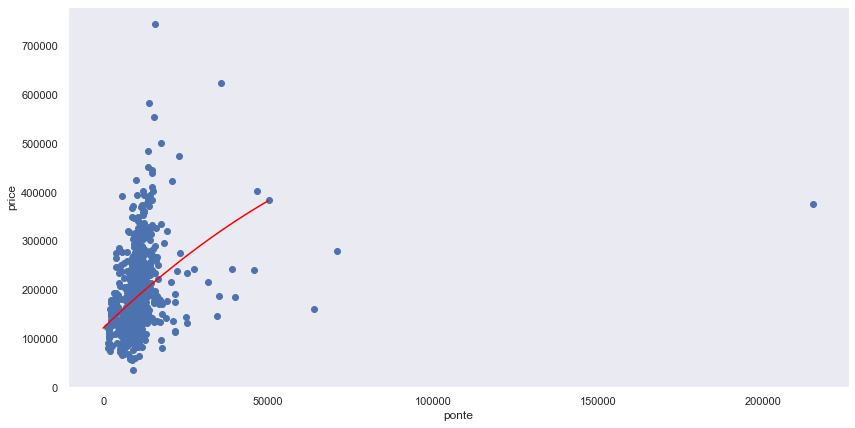

In [85]:
x = X_train["LotArea"]
y = y_train
data_reg = np.polyfit(x, y, 2)
xp = np.linspace(1,50*(10**3), 30)
pr = np.polyval(data_reg, xp)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot()
ax.grid()
ax.set_xlabel("ponte")
ax.set_ylabel("price")
ax.scatter(x,y)
ax.plot(xp, pr , color="RED")

In [37]:
def polyfitter(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results